---
- Course Name : SIT742- Modern Data Science
- Assignment Name : End term Assignment
- Student ID : s224895975, s224923422 , s224871188
- Student Name : Agam, Manasi Hiremath, Priyabrata Pradhan
- Group ID : Group7
- Date : 05-October-2024
---

In [52]:
# !sudo apt update
# !apt-get install openjdk-8-jdk-headless -qq > /dev/null
# #Check this site for the latest download link https://www.apache.org/dyn/closer.lua/spark/spark-3.2.1/spark-3.2.1-bin-hadoop3.2.tgz
# !wget -q https://dlcdn.apache.org/spark/spark-3.2.1/spark-3.2.1-bin-hadoop3.2.tgz
# !tar xf spark-3.2.1-bin-hadoop3.2.tgz
# !pip install -q findspark
# !pip install pyspark
# !pip install py4j

# import os
# import sys
# # os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
# # os.environ["SPARK_HOME"] = "/content/spark-3.2.1-bin-hadoop3.2"


# import findspark
# findspark.init()
# findspark.find()

# import pyspark

# from pyspark.sql import DataFrame, SparkSession
# from typing import List
# import pyspark.sql.types as T
# import pyspark.sql.functions as F

# spark= SparkSession \
#        .builder \
#        .appName("Our First Spark Example") \
#        .getOrCreate()

# spark

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [53]:
!pip install -q findspark
!pip install pyspark
!pip install py4j

import os
import sys
# os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
# os.environ["SPARK_HOME"] = "/content/spark-3.2.1-bin-hadoop3.2"
import findspark
findspark.init()
findspark.find()
import pyspark

from pyspark.sql import DataFrame, SparkSession
from typing import List
import pyspark.sql.types as T
import pyspark.sql.functions as F

spark= SparkSession \
        .builder \
       .appName("Our First Spark Example") \
       .getOrCreate()

spark

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [54]:
!pip install statsmodels


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [55]:
from pyspark import SparkContext
from pyspark.sql import SQLContext
from pyspark.sql import Row
from pyspark.sql import SparkSession
from pyspark.sql.functions import col,isnan, when, count,regexp_replace
from pyspark.sql.types import FloatType
import requests
import gzip
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import textwrap
from sklearn.metrics.pairwise import euclidean_distances
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error
import numpy as np
import itertools
import warnings
warnings.filterwarnings("ignore")


# Set the display option to suppress scientific notation
pd.set_option('display.float_format', '{:.2f}'.format)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [56]:
# download file if it does not exist.

def download_file_if_not_exists(url, save_path):
  """ Download a file from URL if it doesnot exist at a given path
  Input:
  url: URL path of the file
  save_path: path to save the file
  output: if download if it does not exist else message
  """
  # This condition download files from URL if its does not exist at a local path
  if not os.path.exists(save_path):
    print(f"Downloading file from {url} to {save_path}")
    !wget {save_path} {url}
  else:
     # This condition skips download if file exists
    print(f"File already exist at {save_path}. Skipping download")

# Run above function to retrive transactionrecord file
file_url = 'https://raw.githubusercontent.com/tulip-lab/sit742/develop/Assessment/2024/data/transactionrecord.gz'
local_file_path = 'transactionrecord.gz'
# download required file
download_file_if_not_exists(file_url, local_file_path)

File already exist at transactionrecord.gz. Skipping download


In [57]:
# read input file using spark
# delete if df_spark lready exist and create new dataframe with transaction record
try:
  del df_spark
  print("df_spark is deleted")
except:
  pass
print(f"Creating dataframe from input file-{local_file_path}")
df_spark = spark.read.csv("transactionrecord.gz", header=True, inferSchema=True)
# df_spark=spark.read.csv("transactionrecord.gz", header=True, inferSchema=True)
# check input dataframe schema
print("schema of dataframe")
df_spark.printSchema()
#check sample observations
print("Check Sample observation")
df_spark.show(2)

df_spark is deleted
Creating dataframe from input file-transactionrecord.gz
schema of dataframe
root
 |-- TransactionNo: string (nullable = true)
 |-- Date: string (nullable = true)
 |-- ProductNo: string (nullable = true)
 |-- ProductName: string (nullable = true)
 |-- Product_category: string (nullable = true)
 |-- Price: double (nullable = true)
 |-- Quantity: integer (nullable = true)
 |-- CustomerNo: integer (nullable = true)
 |-- Country: string (nullable = true)

Check Sample observation
+-------------+---------+---------+--------------------+----------------+-----+--------+----------+--------------+
|TransactionNo|     Date|ProductNo|         ProductName|Product_category|Price|Quantity|CustomerNo|       Country|
+-------------+---------+---------+--------------------+----------------+-----+--------+----------+--------------+
|       581482|12/9/2019|    22485|Set Of 2 Wooden M...|             0ca|21.47|      12|     17490|United Kingdom|
|       581475|12/9/2019|    22596|Chris

**Question 1.1**

**Answer 1.1.1**

In [58]:
# replace "NA" values in CustomerNo with -1
# check the columns with values "NA"
df_spark = df_spark.withColumn("CustomerNo", when(col("CustomerNO")=='NA',-1).otherwise(col("CustomerNo")))
# checking dataframe after transformation
df_spark.filter(df_spark.CustomerNo== -1).show(2)

+-------------+---------+---------+--------------------+----------------+-----+--------+----------+--------------+
|TransactionNo|     Date|ProductNo|         ProductName|Product_category|Price|Quantity|CustomerNo|       Country|
+-------------+---------+---------+--------------------+----------------+-----+--------+----------+--------------+
|      C581406|12/8/2019|   46000M|Polyester Filler ...|             0ca| 6.19|    -240|        -1|United Kingdom|
|      C581406|12/8/2019|   46000S|Polyester Filler ...|             0ca| 6.19|    -300|        -1|United Kingdom|
+-------------+---------+---------+--------------------+----------------+-----+--------+----------+--------------+
only showing top 2 rows



**Answer 1.1.2**

In [59]:
# check productName values
print("Check product name column before creating columns")
df_spark.select("ProductName").distinct().show(2,truncate=False)
# create productName_process by using only alphabates
df_spark = df_spark.withColumn("productName_process", regexp_replace(col("ProductName"), r'(\d+)', ""))
df_spark.select("ProductName","productName_process").show(5,truncate=False)

Check product name column before creating columns
+---------------------------------+
|ProductName                      |
+---------------------------------+
|Parisienne Sewing Box            |
|Pack Of 12 50'S Christmas Tissues|
+---------------------------------+
only showing top 2 rows

+-----------------------------------+-----------------------------------+
|ProductName                        |productName_process                |
+-----------------------------------+-----------------------------------+
|Set Of 2 Wooden Market Crates      |Set Of  Wooden Market Crates       |
|Christmas Star Wish List Chalkboard|Christmas Star Wish List Chalkboard|
|Storage Tin Vintage Leaf           |Storage Tin Vintage Leaf           |
|Tree T-Light Holder Willie Winkie  |Tree T-Light Holder Willie Winkie  |
|Set Of 4 Knick Knack Tins Poppies  |Set Of  Knick Knack Tins Poppies   |
+-----------------------------------+-----------------------------------+
only showing top 5 rows



**Question 1.2**

**Answer 1.2.1**

In [60]:
# create new column Revenue using price and quantity
df_spark= df_spark.withColumn("Revenue", (col("Price")* col("Quantity")).cast(FloatType()))
df_spark.show(5)

+-------------+---------+---------+--------------------+----------------+-----+--------+----------+--------------+--------------------+-------+
|TransactionNo|     Date|ProductNo|         ProductName|Product_category|Price|Quantity|CustomerNo|       Country| productName_process|Revenue|
+-------------+---------+---------+--------------------+----------------+-----+--------+----------+--------------+--------------------+-------+
|       581482|12/9/2019|    22485|Set Of 2 Wooden M...|             0ca|21.47|      12|     17490|United Kingdom|Set Of  Wooden Ma...| 257.64|
|       581475|12/9/2019|    22596|Christmas Star Wi...|             0ca|10.65|      36|     13069|United Kingdom|Christmas Star Wi...|  383.4|
|       581475|12/9/2019|    23235|Storage Tin Vinta...|             0ca|11.53|      12|     13069|United Kingdom|Storage Tin Vinta...| 138.36|
|       581475|12/9/2019|    23272|Tree T-Light Hold...|             0ca|10.65|      12|     13069|United Kingdom|Tree T-Light Hold...| 

**Answer 1.2.2**

In [61]:
#convert spark dataframe to pandas dataframe
df=df_spark.toPandas()
#create transaction_date date variable with date format
df['transaction_date'] = pd.to_datetime(df['Date'])
df.drop(columns=['Date'])
# check first 5 observations
df.head()

,TransactionNo,Date,ProductNo,ProductName,Product_category,Price,Quantity,CustomerNo,Country,productName_process,Revenue,transaction_date
0,581482,12/9/2019,22485,Set Of 2 Wooden Market Crates,0ca,21.47,12,17490,United Kingdom,Set Of Wooden Market Crates,257.64,2019-12-09
1,581475,12/9/2019,22596,Christmas Star Wish List Chalkboard,0ca,10.65,36,13069,United Kingdom,Christmas Star Wish List Chalkboard,383.40,2019-12-09
2,581475,12/9/2019,23235,Storage Tin Vintage Leaf,0ca,11.53,12,13069,United Kingdom,Storage Tin Vintage Leaf,138.36,2019-12-09
3,581475,12/9/2019,23272,Tree T-Light Holder Willie Winkie,0ca,10.65,12,13069,United Kingdom,Tree T-Light Holder Willie Winkie,127.80,2019-12-09
4,581475,12/9/2019,23239,Set Of 4 Knick Knack Tins Poppies,0ca,11.94,6,13069,United Kingdom,Set Of Knick Knack Tins Poppies,71.64,2019-12-09


**Answer 1.2.3**

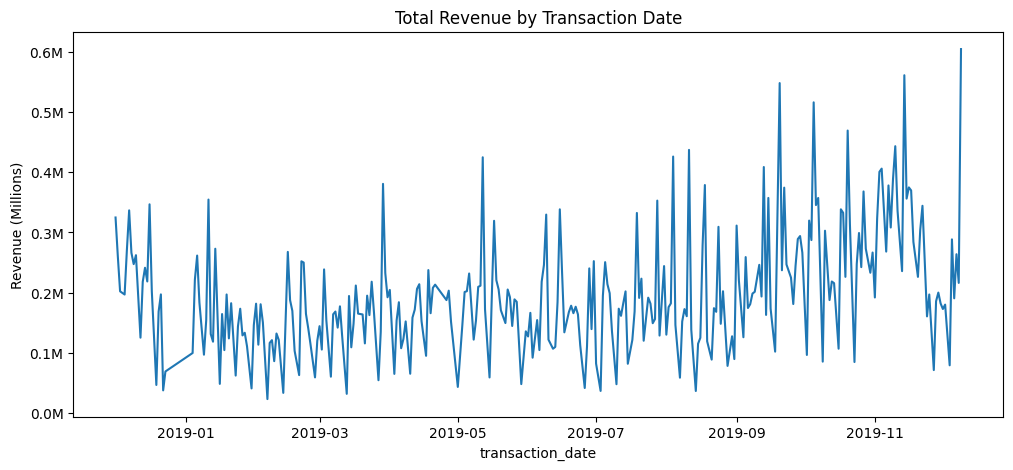

In [62]:
#Plot the sum of revenue on transaction_date in a line plot
df_group=df.groupby(['transaction_date'],as_index=False)['Revenue'].sum()
# plot the line plot
fig,ax=plt.subplots(figsize=(12,5))
ax=sns.lineplot(data=df_group, x='transaction_date',y='Revenue')
ax.set_title("Total Revenue by Transaction Date")
ax.set_ylabel("Revenue (Millions)")  # Set y-axis label
ax.yaxis.set_major_formatter(lambda x, pos: f'{x / 1000000:.1f}M')
plt.show()

**Summary**
- Data shows increasing trend
- Daily shows high variations, needs more investigation to check if this variation is due to weekends, holidays etc


**Question 1.3**

**Answer 1.3.1**

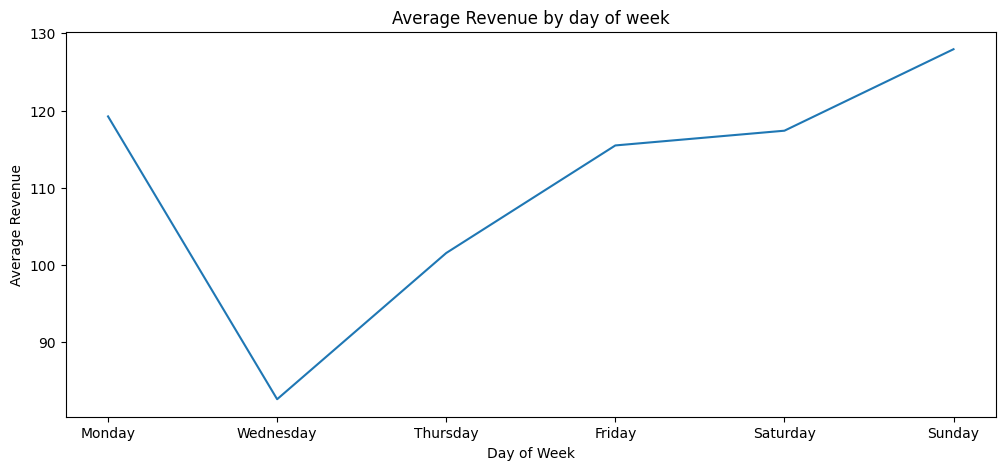

In [63]:
#create variable day of week
df['day_of_week']=df['transaction_date'].dt.dayofweek
#average revenue by day of week
df_avg_revenue=df.groupby(['day_of_week'],as_index=False)['Revenue'].mean()
#naming day of week 0-Monday to 6- Sunday
day_names = [
    "Monday",
    "Tuesday",
    "Wednesday",
    "Thursday",
    "Friday",
    "Saturday",
    "Sunday",
]
# mapping weekday name
df_avg_revenue["day_of_week_name"] = df_avg_revenue['day_of_week'].map(lambda x: day_names[x])

# #Plot the sum of revenue on transaction_date in a line plot
# plot the line plot
fig,ax=plt.subplots(figsize=(12,5))
ax=sns.lineplot(data=df_avg_revenue, x='day_of_week_name',y='Revenue',sort=True)
ax.set_title("Average Revenue by day of week")
ax.set_ylabel("Average Revenue")  # Set y-axis label
ax.set_xlabel("Day of Week")
plt.show()


**Answer 1.3.2**

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536350 entries, 0 to 536349
Data columns (total 13 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   TransactionNo        536350 non-null  object        
 1   Date                 536350 non-null  object        
 2   ProductNo            536350 non-null  object        
 3   ProductName          536350 non-null  object        
 4   Product_category     536350 non-null  object        
 5   Price                536350 non-null  float64       
 6   Quantity             536350 non-null  int32         
 7   CustomerNo           536350 non-null  int32         
 8   Country              536350 non-null  object        
 9   productName_process  536350 non-null  object        
 10  Revenue              536350 non-null  float32       
 11  transaction_date     536350 non-null  datetime64[ns]
 12  day_of_week          536350 non-null  int32         
dtypes: datetime64[

In [65]:
#find the max revenue day of week
max_rev_dayofweek=df_avg_revenue.loc[df_avg_revenue['Revenue'].idxmax()]['day_of_week']
# Filter the original dataframe (df) for transactions on that workday
df_max_rev_workday = df[df['day_of_week'] == max_rev_dayofweek]

# Find the product with the highest revenue on that workday
product_with_max_rev = df_max_rev_workday.groupby('productName_process')['Revenue'].sum().idxmax()

# Find the product with the highest sales volume (sum of quantity) on that workday
product_with_max_volume = df_max_rev_workday.groupby('productName_process')['Quantity'].sum().idxmax()
print("**********Summary***********************")
print( f"The day of week with highest average revenue is: {day_names[max_rev_dayofweek]}")
print( f"Product with maximum revenue: {product_with_max_rev}")
print( f"Product with maximum sales volume: {product_with_max_volume}")

**********Summary***********************
The day of week with highest average revenue is: Sunday
Product with maximum revenue: World War  Gliders Asstd Designs
Product with maximum sales volume: World War  Gliders Asstd Designs


**Answer 1.3.3**

In [66]:
# Find top products with highest revenue
top_5_max_rev_products=df.groupby(['productName_process'],as_index=False)['Revenue'].sum().sort_values(by='Revenue',ascending=False).head(5)
# Find top products with highest volume
top_5_max_volume_products=df.groupby(['productName_process'],as_index=False)['Quantity'].sum().sort_values(by='Quantity',ascending=False).head(5)


In [67]:
# dx.bar(data=top_5_max_rev_products, x='productName_process',y='Revenue',x_textwrap=10)

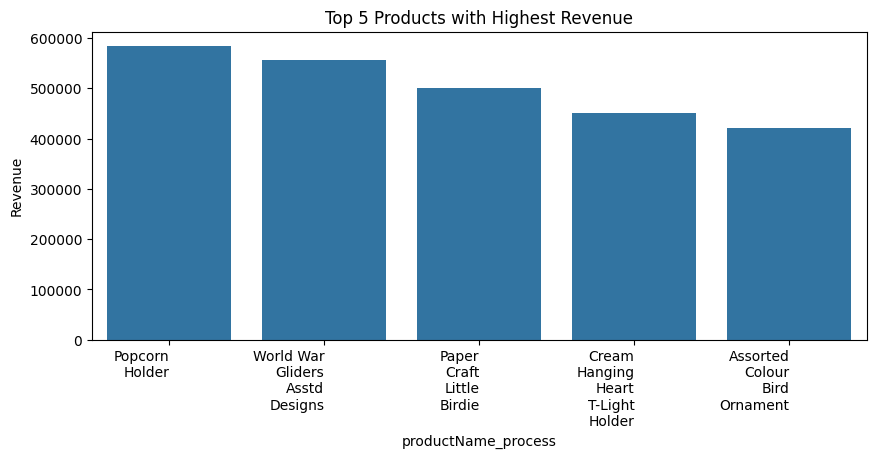

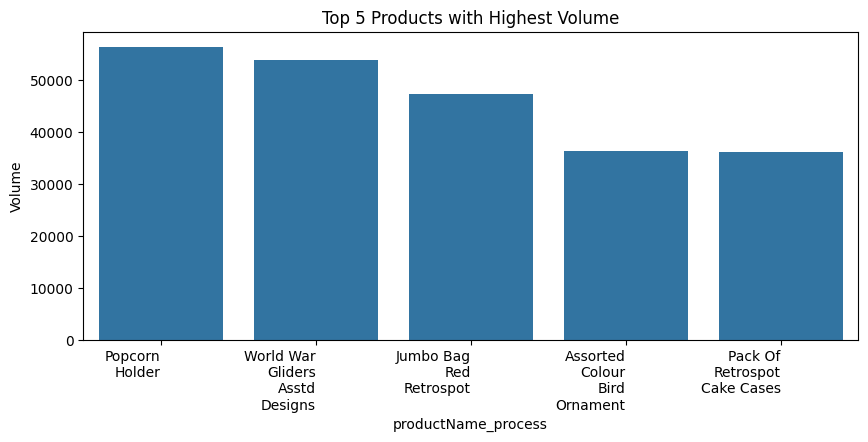

In [68]:
# creating test wrap function as labels are not dispalyed properly by default in bar plot
def wrap_labels(ax, width, break_long_words=False):
  labels = []
  for label in ax.get_xticklabels():
    text = label.get_text()
    labels.append(textwrap.fill(text, width=width,
                                break_long_words=break_long_words))
  ax.set_xticklabels(labels, rotation=0, ha='right')


# Example usage with your existing plot:
fig, ax = plt.subplots(figsize=(10, 4))
ax = sns.barplot(data=top_5_max_rev_products, x='productName_process',
                 y='Revenue')
wrap_labels(ax, width=10)
ax.set_title("Top 5 Products with Highest Revenue")
ax.set_ylabel("Revenue")
plt.show()

# Example usage with your existing plot:
fig, ax = plt.subplots(figsize=(10, 4))
ax = sns.barplot(data=top_5_max_volume_products, x='productName_process',
                 y='Quantity')
wrap_labels(ax, width=10)
ax.set_title("Top 5 Products with Highest Volume")
ax.set_ylabel("Volume")
plt.show()


**Answer 1.4**

In [69]:
country_wise_revenue=df.groupby(['Country'],as_index=False)['Revenue'].sum().sort_values(by='Revenue',ascending=False)
max_country_val=country_wise_revenue.loc[country_wise_revenue['Revenue'].idxmax()]['Country']
# Filter the original dataframe (df) for transactions for that country
df_max_rev_workday = df[df['Country'] == max_country_val]
df_max_rev_workday.loc[:, 'Month'] = df_max_rev_workday['transaction_date'].dt.month
country_wise_revenue_mth=df_max_rev_workday.groupby(['Month'],as_index=False)['Revenue'].sum().sort_values(by='Revenue',ascending=False).head(1)
max_country_mth_val=country_wise_revenue_mth.loc[country_wise_revenue_mth['Revenue'].idxmax()]['Month']
print(f"The country with the highest revenue is: {max_country_val}")
print(f"The month with the highest revenue in that country is: {max_country_mth_val}")

The country with the highest revenue is: United Kingdom
The month with the highest revenue in that country is: 11.0


**Answer 1.5**

In [70]:
# remove records with quantity > 0
print("Shape of data before filter",format(df.shape))
df_pos_quantity= df[df['Quantity']>0]
print("Number of records with negative quantity",format(df.shape[0]-df_pos_quantity.shape[0]))


# find cusomter with high distinct transactions
transac_freq_cust=df_pos_quantity.groupby(['CustomerNo'],as_index=False)['TransactionNo'].nunique().sort_values(by='TransactionNo',ascending=False)
# Customer with maximum transaction
cust_with_high_trans=transac_freq_cust.loc[transac_freq_cust['TransactionNo'].idxmax()]['CustomerNo']
print(f"Customer with maximum transaction is:{cust_with_high_trans}")


# Filter the original dataframe (df) for transactions for this customer
df_max_trans_cust = df_pos_quantity[df_pos_quantity['CustomerNo'] == cust_with_high_trans]
prod_with_max_qunt=df_max_trans_cust.groupby(['productName_process'],as_index=False)['Quantity'].sum().sort_values(by='Quantity', ascending=False)
prod_with_max_qunt_val=prod_with_max_qunt.loc[prod_with_max_qunt['Quantity'].idxmax()]['productName_process']
print(f"The most frequent product bought by customer {cust_with_high_trans} is {prod_with_max_qunt_val}")

Shape of data before filter (536350, 13)
Number of records with negative quantity 8585
Customer with maximum transaction is:12748
The most frequent product bought by customer 12748 is Victorian Metal Postcard Spring


In [71]:
df_pos_quantity.head()

,TransactionNo,Date,ProductNo,ProductName,Product_category,Price,Quantity,CustomerNo,Country,productName_process,Revenue,transaction_date,day_of_week
0,581482,12/9/2019,22485,Set Of 2 Wooden Market Crates,0ca,21.47,12,17490,United Kingdom,Set Of Wooden Market Crates,257.64,2019-12-09,0
1,581475,12/9/2019,22596,Christmas Star Wish List Chalkboard,0ca,10.65,36,13069,United Kingdom,Christmas Star Wish List Chalkboard,383.40,2019-12-09,0
2,581475,12/9/2019,23235,Storage Tin Vintage Leaf,0ca,11.53,12,13069,United Kingdom,Storage Tin Vintage Leaf,138.36,2019-12-09,0
3,581475,12/9/2019,23272,Tree T-Light Holder Willie Winkie,0ca,10.65,12,13069,United Kingdom,Tree T-Light Holder Willie Winkie,127.80,2019-12-09,0
4,581475,12/9/2019,23239,Set Of 4 Knick Knack Tins Poppies,0ca,11.94,6,13069,United Kingdom,Set Of Knick Knack Tins Poppies,71.64,2019-12-09,0


## Market Basket Analysis

**Answer 1.6.1**

In [72]:
# Group by the transactionNo and aggregate the category of product (column product_category) into
# list on transactionNo level. Similarly, group and aggregate name of product (column
# productName_process) into list on transactionNo level.

In [73]:
df_1=df_pos_quantity.groupby(['TransactionNo'],as_index=False)['Product_category'].agg(list)
t2=df_pos_quantity.groupby(['TransactionNo'],as_index=False)['productName_process'].agg(list)

**Answer 1.6.2**

In [74]:
# Remove duplicates in Product category list
df_1['Product_category']=df_1['Product_category'].apply(lambda x: list(set(x)))



**Answer 1.7.1**

In [75]:
df_1['Prod_len']=df_1['Product_category'].apply(lambda x: len(x))
df_1.head()


,TransactionNo,Product_category,Prod_len
0,536365,[0ca],1
1,536366,[0ca],1
2,536367,[0ca],1
3,536368,[0ca],1
4,536369,[0ca],1


**Answer 1.7.2**

In [76]:
df_w=pd.DataFrame()
def data_processing(df,maxlength =3,min_length=1):
  df_w=df[df['Prod_len']<=maxlength]
  df_w=df_w[df_w['Prod_len']>=min_length]
  df_w['path'] = df_w['Product_category'].apply(lambda x: ' > '.join(x))
  df_w['path'] = str('start > ')+df_w['path'].apply(lambda x: str(x).replace(",", " > ")) + str(" > conversion")

  return df_w

df_2=data_processing(df_1,maxlength =5,min_length=2)
df_2.head(10)

# # df_1['path'] = df_1['Product_category'].apply(lambda x: ' > '.join(x))
# # df_1['path'] = str('start > ')+df_1['path'].apply(lambda x: str(x).replace(",", " > ")) + str(" > conversion")
# # df_1.head()

,TransactionNo,Product_category,Prod_len,path
13,536378,"[0ca, 1ca]",2,start > 0ca > 1ca > conversion
27,536395,"[0ca, 1ca]",2,start > 0ca > 1ca > conversion
36,536404,"[4ca, 0ca, 1ca]",3,start > 4ca > 0ca > 1ca > conversion
40,536408,"[0ca, 1ca]",2,start > 0ca > 1ca > conversion
42,536412,"[4ca, 0ca]",2,start > 4ca > 0ca > conversion
43,536415,"[0ca, 1ca]",2,start > 0ca > 1ca > conversion
52,536464,"[0ca, 1ca]",2,start > 0ca > 1ca > conversion
72,536532,"[0ca, 1ca]",2,start > 0ca > 1ca > conversion
82,536542,"[4ca, 0ca]",2,start > 4ca > 0ca > conversion
83,536544,"[4ca, 0ca, 1ca]",3,start > 4ca > 0ca > 1ca > conversion


**Answer 1.8.1**

In [77]:
patterns=[' > 0ca > conversion', ' > 1ca > conversion', ' > 2ca > conversion',
    ' > 3ca > conversion', ' > 4ca > conversion']

results={pattern: df_2['path'].str.endswith(pattern).sum() for pattern in patterns}

results

{' > 0ca > conversion': 825,
 ' > 1ca > conversion': 1085,
 ' > 2ca > conversion': 1230,
 ' > 3ca > conversion': 465,
 ' > 4ca > conversion': 0}

**Answer 1.8.2**

In [78]:
patterns_to_check = [
    '0ca > 0ca', '0ca > 1ca', '0ca > 2ca', '0ca > 3ca', '0ca > 4ca',
    '0ca > conversion'
]

results_1={pattern: df_2['path'].str.contains(pattern).sum() for pattern in patterns_to_check}

results_1

{'0ca > 0ca': 0,
 '0ca > 1ca': 1319,
 '0ca > 2ca': 1020,
 '0ca > 3ca': 441,
 '0ca > 4ca': 0,
 '0ca > conversion': 825}

**Answer 1.8.3**

In [79]:
patterns_to_check = [
    ' > 0ca >'
]

results_2={pattern: df_2['path'].str.contains(pattern).sum() for pattern in patterns_to_check}

results_2

{' > 0ca >': 3605}

**Answer 1.8.4**

In [80]:
total_sum = 0
for pattern in results_1:
    if results_1[pattern] != 0 and results_2[' > 0ca >'] != 0:
        total_sum += results_1[pattern] / results_2[' > 0ca >']

print(total_sum)


1.0


**Question 1.9**

In [81]:
!pip install mlxtend


**Answer 1.9.1**

In [82]:
import pandas as pd

# Step 1: Filter out transactions with negative quantities
df_filtered = df[df['Quantity'] > 0]

# Step 2: Rank products by the sum of quantity and keep the top 100 products
top_100_products = df_filtered.groupby('productName_process')['Quantity'].sum().nlargest(100).index

# Step 3: Filter the dataframe to keep only the top 100 products
df_filtered_top_100 = df_filtered[df_filtered['productName_process'].isin(top_100_products)]

# Step 4: Pivot the dataframe to create a transaction-level product dataframe
transaction_product_df = df_filtered_top_100.pivot_table(
    index='TransactionNo',
    columns='productName_process',
    values='Quantity',
    aggfunc='sum',
    fill_value=0
)

# Display the first few rows of the transaction-level product dataframe
transaction_product_df.head()


productName_process,Cake Cases Vintage Christmas,Ribbons Rustic Charm,Sweetheart Fairy Cake Cases,Teatime Fairy Cake Cases,"""""""Assorted Flower Colour """"""""Leis""""""""""""""",Aged Glass Silver T-Light Holder,Antique Silver T-Light Glass,Assorted Colour Bird Ornament,Assorted Colours Silk Fan,Asstd Design d Paper Stickers,...,Spaceboy Lunch Box,Strawberry Ceramic Trinket Pot,Strawberry Charlotte Bag,Travel Card Wallet Keep Calm,Victorian Glass Hanging T-Light,Vintage Snap Cards,Wooden Heart Christmas Scandinavian,Wooden Star Christmas Scandinavian,Woodland Charlotte Bag,World War Gliders Asstd Designs
TransactionNo,,,,,,,,,,,,,,,,,,,,,
536365,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536367,0,0,0,0,0,0,0,32,0,0,...,0,0,0,0,0,0,0,0,0,0
536370,0,0,0,0,0,0,0,0,0,0,...,24,0,0,0,0,0,0,0,0,0
536371,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
536373,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Answer 1.9.2**

In [83]:
from mlxtend.frequent_patterns import apriori, association_rules

# Step 1: Filter transactions with 4 or more items (i.e., sum of quantities >= 4)
filtered_transaction_df = transaction_product_df[transaction_product_df.sum(axis=1) >= 4]

# Step 2: Convert the dataframe to a binary format (presence/absence of products)
binary_transaction_df = filtered_transaction_df.applymap(lambda x: 1 if x > 0 else 0)

# Step 3: Apply Apriori algorithm to find frequent itemsets with minimum support of 1.5%
frequent_itemsets = apriori(binary_transaction_df, min_support=0.015, use_colnames=True)

# Step 4: Display the frequent itemsets found
frequent_itemsets.head()


,support,itemsets
0,0.04,( Cake Cases Vintage Christmas)
1,0.06,( Ribbons Rustic Charm)
2,0.04,( Sweetheart Fairy Cake Cases)
3,0.06,( Teatime Fairy Cake Cases)
4,0.02,(Aged Glass Silver T-Light Holder)


**Answer 1.9.3**

In [84]:
# Step 1: Run the Apriori algorithm with a minimum support of 1.0%
frequent_itemsets = apriori(binary_transaction_df, min_support=0.01, use_colnames=True)

# Step 2: Generate association rules with lift > 10
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=10)

# Step 3: Display the association rules found
rules.head()


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Charlotte Bag Pink Polkadot),(Red Retrospot Charlotte Bag),0.05,0.07,0.04,0.70,10.08,0.03,3.14,0.95
1,(Red Retrospot Charlotte Bag),(Charlotte Bag Pink Polkadot),0.07,0.05,0.04,0.51,10.08,0.03,1.92,0.97
2,(Strawberry Charlotte Bag),(Charlotte Bag Pink Polkadot),0.05,0.05,0.03,0.52,10.46,0.02,2.00,0.95
3,(Charlotte Bag Pink Polkadot),(Strawberry Charlotte Bag),0.05,0.05,0.03,0.51,10.46,0.02,1.94,0.95
4,(Spaceboy Lunch Box),(Dolly Girl Lunch Box),0.06,0.06,0.04,0.60,10.58,0.03,2.37,0.96


**Answer 1.9.4**

i) Lower Support (0.5%) and Moderate Lift (≥ 5)

In [85]:
# Run Apriori with lower support of 0.005 (0.5%) and moderate lift
frequent_itemsets = apriori(binary_transaction_df, min_support=0.005, use_colnames=True)

# Generate association rules with lift ≥ 5
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=5)

# Display the rules
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head())


                           antecedents                            consequents  \
0      ( Cake Cases Vintage Christmas)         (Paper Chain Kit 'S Christmas)   
1       (Paper Chain Kit 'S Christmas)        ( Cake Cases Vintage Christmas)   
2      ( Cake Cases Vintage Christmas)    (Paper Chain Kit Vintage Christmas)   
3  (Paper Chain Kit Vintage Christmas)        ( Cake Cases Vintage Christmas)   
4      ( Cake Cases Vintage Christmas)  (Rotating Silver Angels T-Light Hldr)   

   support  confidence  lift  
0     0.02        0.44  5.76  
1     0.02        0.24  5.76  
2     0.02        0.40  7.41  
3     0.02        0.31  7.41  
4     0.01        0.17  5.82  


ii) Higher Support (2%) and Lower Confidence (≥ 0.3)

In [86]:
# Run Apriori with higher support of 0.02 (2%) and lower confidence
frequent_itemsets = apriori(binary_transaction_df, min_support=0.02, use_colnames=True)

# Generate association rules with confidence ≥ 0.3
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.3)

# Display the rules
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head())


                          antecedents                         consequents  \
0      ( Sweetheart Fairy Cake Cases)     (Pack Of  Retrospot Cake Cases)   
1         ( Teatime Fairy Cake Cases)  (Pack Of  Pink Paisley Cake Cases)   
2  (Pack Of  Pink Paisley Cake Cases)         ( Teatime Fairy Cake Cases)   
3     (Pack Of  Retrospot Cake Cases)         ( Teatime Fairy Cake Cases)   
4         ( Teatime Fairy Cake Cases)     (Pack Of  Retrospot Cake Cases)   

   support  confidence  lift  
0     0.02        0.49  5.52  
1     0.02        0.43  7.30  
2     0.02        0.41  7.30  
3     0.03        0.35  6.20  
4     0.03        0.55  6.20  


iii)Moderate Support (1%), Moderate Confidence (≥ 0.5), and Moderate Lift (≥ 5)

In [87]:
# Run Apriori with moderate support of 0.01 (1%) and moderate confidence and lift
frequent_itemsets = apriori(binary_transaction_df, min_support=0.01, use_colnames=True)

# Generate association rules with lift ≥ 5 and confidence ≥ 0.5
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=5)
rules = rules[rules['confidence'] >= 0.5]

# Display the rules
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head())


                      antecedents                      consequents  support  \
19    ( Teatime Fairy Cake Cases)  (Pack Of  Retrospot Cake Cases)     0.03   
27  (Charlotte Bag Pink Polkadot)      (Charlotte Bag Suki Design)     0.03   
28  (Charlotte Bag Pink Polkadot)    (Red Retrospot Charlotte Bag)     0.04   
29  (Red Retrospot Charlotte Bag)    (Charlotte Bag Pink Polkadot)     0.04   
30     (Strawberry Charlotte Bag)    (Charlotte Bag Pink Polkadot)     0.03   

    confidence  lift  
19        0.55  6.20  
27        0.55  9.34  
28        0.70 10.08  
29        0.51 10.08  
30        0.52 10.46  


iv) Lower Support (0.3%), Lower Confidence (≥ 0.2), and High Lift (≥ 8)

In [88]:
"""# Run Apriori with lower support of 0.003 (0.3%), lower confidence, and high lift
frequent_itemsets = apriori(binary_transaction_df, min_support=0.003, use_colnames=True)

# Generate association rules with lift ≥ 8 and confidence ≥ 0.2
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=8)
rules = rules[rules['confidence'] >= 0.2]

# Display the rules
print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head())"""


'# Run Apriori with lower support of 0.003 (0.3%), lower confidence, and high lift\nfrequent_itemsets = apriori(binary_transaction_df, min_support=0.003, use_colnames=True)\n\n# Generate association rules with lift ≥ 8 and confidence ≥ 0.2\nrules = association_rules(frequent_itemsets, metric="lift", min_threshold=8)\nrules = rules[rules[\'confidence\'] >= 0.2]\n\n# Display the rules\nprint(rules[[\'antecedents\', \'consequents\', \'support\', \'confidence\', \'lift\']].head())'

**Conclusion:**

By adjusting the support, confidence, and lift values, we can discover different sets of rules. Lowering support brings out less frequent itemsets, while increasing confidence and lift emphasizes stronger associations between the items in those transactions. These patterns help understand different product purchase behaviors, and each set of parameters provides insights into varying levels of product association.

**Answer 1.10.1**

In [89]:
# Step 1: Filter out transactions with negative quantity values
df_filtered = df[df['Quantity'] > 0]

# Step 2: Find the top 100 products by total quantity sold
top_100_products = df_filtered.groupby('productName_process')['Quantity'].sum().nlargest(100).index

# Step 3: Filter the dataframe to keep only the top 100 products
df_top_100 = df_filtered[df_filtered['productName_process'].isin(top_100_products)]

# Step 4: Aggregate the quantities by customerNo and productName_process
customer_product_df = df_top_100.pivot_table(
    index='CustomerNo',
    columns='productName_process',
    values='Quantity',
    aggfunc='sum',
    fill_value=0
)

# Step 5: Display the first few rows of the customer product dataframe
customer_product_df.head()


productName_process,Cake Cases Vintage Christmas,Ribbons Rustic Charm,Sweetheart Fairy Cake Cases,Teatime Fairy Cake Cases,"""""""Assorted Flower Colour """"""""Leis""""""""""""""",Aged Glass Silver T-Light Holder,Antique Silver T-Light Glass,Assorted Colour Bird Ornament,Assorted Colours Silk Fan,Asstd Design d Paper Stickers,...,Spaceboy Lunch Box,Strawberry Ceramic Trinket Pot,Strawberry Charlotte Bag,Travel Card Wallet Keep Calm,Victorian Glass Hanging T-Light,Vintage Snap Cards,Wooden Heart Christmas Scandinavian,Wooden Star Christmas Scandinavian,Woodland Charlotte Bag,World War Gliders Asstd Designs
CustomerNo,,,,,,,,,,,,,,,,,,,,,
12004,0,0,0,0,0,0,0,0,0,0,...,0,4,0,0,0,0,0,0,0,0
12008,0,1,0,0,0,1,40,0,0,0,...,0,1,0,0,3,2,0,0,0,0
12025,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12026,1,1,1,1,0,0,0,0,0,0,...,0,1,1,0,0,0,0,0,1,1
12031,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Answer 1.10.2**

In [90]:
from sklearn.metrics.pairwise import euclidean_distances

# Step 1: Calculate the Pairwise Euclidean Distance using product quantities
euclidean_dist_matrix = euclidean_distances(customer_product_df)

# Step 2: Convert the result into a DataFrame for better readability
customer_distances_df = pd.DataFrame(
    euclidean_dist_matrix,
    index=customer_product_df.index,
    columns=customer_product_df.index
)

# Step 3: Display the first few rows of the pairwise Euclidean distance matrix
customer_distances_df.head()


CustomerNo,12004,12008,12025,12026,12031,12042,12043,12050,12057,12063,...,18269,18270,18272,18274,18276,18277,18281,18282,18283,18287
CustomerNo,,,,,,,,,,,,,,,,,,,,,
12004,0.00,42.13,13.15,10.05,9.95,22.07,19.42,8.43,33.85,8.77,...,22.52,14.80,136.22,20.00,48.45,28.55,13.23,14.00,99.01,42.65
12008,42.13,0.00,43.47,41.74,42.31,46.13,44.38,41.74,53.66,42.00,...,47.85,43.66,139.81,45.68,45.98,50.02,43.15,43.12,107.79,59.82
12025,13.15,43.47,0.00,15.23,9.90,24.86,19.39,13.27,32.33,14.14,...,27.82,18.49,137.54,22.87,49.70,30.63,17.26,17.86,97.48,45.14
12026,10.05,41.74,15.23,0.00,9.70,20.54,21.95,6.78,37.08,6.00,...,24.70,13.34,135.54,18.95,48.02,27.82,11.58,12.45,99.41,43.01
12031,9.95,42.31,9.90,9.70,0.00,22.18,20.25,7.21,33.99,7.87,...,25.22,14.28,137.04,19.62,48.29,28.28,12.65,13.45,99.19,43.59


**Answer 1.10.3**

In [91]:
# Step 1: Find the top 3 most similar customers to CustomerNo == 13069
similar_customers_13069 = customer_distances_df.loc[13069].sort_values().head(4)[1:]  # Exclude itself
print("Top 3 similar customers to CustomerNo 13069:")
print(similar_customers_13069)

# Step 2: Find the top 3 most similar customers to CustomerNo == 17490
similar_customers_17490 = customer_distances_df.loc[17490].sort_values().head(4)[1:]  # Exclude itself
print("Top 3 similar customers to CustomerNo 17490:")
print(similar_customers_17490)


Top 3 similar customers to CustomerNo 13069:
CustomerNo
15118    598.37
17523   1449.09
18179   1734.76
Name: 13069, dtype: float64
Top 3 similar customers to CustomerNo 17490:
CustomerNo
12582   26.00
12519   26.00
12652   26.70
Name: 17490, dtype: float64


**Answer 1.10.4**

In [92]:
# Step 1: Identify products not purchased by CustomerNo == 13069
products_not_bought = customer_product_df.columns[customer_product_df.loc[13069] == 0]

# Step 2: Get the top 3 similar customers to CustomerNo == 13069 (from previous step)
similar_customers_13069 = [similar_customers_13069.index[0], similar_customers_13069.index[1], similar_customers_13069.index[2]]

# Step 3: Check which products the similar customers have bought and recommend the ones that CustomerNo == 13069 has not bought
recommended_products = customer_product_df.loc[similar_customers_13069, products_not_bought].sum().sort_values(ascending=False).head()

# Step 4: Display the recommended products
print("Recommended products for CustomerNo 13069 based on similar customers' purchases:")
print(recommended_products)


Recommended products for CustomerNo 13069 based on similar customers' purchases:
productName_process
Mini Paint Set Vintage                       36
"""Assorted Flower Colour """"Leis"""""""    24
Pack Of  Retrospot Cake Cases                24
Doughnut Lip Gloss                           20
Paper Chain Kit Vintage Christmas            18
dtype: int64


**Suggestions for CustomerNo 13069:**

Based on the recommendations received from the top 3 most similar customers, the following steps can be taken to provide product recommendations for CustomerNo 13069:

**Highlight Similar Customers' Preferences:** The similar customers have shown strong preferences for products like the "Mini Paint Set Vintage" and "Assorted Flower Colour Leis." These products are frequently bought by similar customers and should be recommended as they may align with CustomerNo 13069's tastes.

**Promotional Strategies:** You could introduce a bundle discount or special offer involving these top-recommended products. For example, bundling the "Doughnut Lip Gloss" and "Paper Chain Kit Vintage Christmas" could attract the customer's attention during a festive season, encouraging them to purchase items they haven't bought before.

**Personalized Suggestions:** Highlight these products on CustomerNo 13069's account page or through personalized email marketing campaigns. The logic behind the recommendation can also be made visible to the customer (e.g., "People similar to you often buy these products...").

**Cross-Sell Related Items:** Based on the recommended products, suggest other items that frequently complement these products, such as accessories or additional items in the same theme.

In [93]:
"""# remove records with quantity > 0
print("Shape of data before filter",format(df.shape))
df_pos_quantity= df[df['Quantity']>0]
print("Number of records with negative quantity",format(df.shape[0]-df_pos_quantity.shape[0]))
df_pos_quantity
#find top 100 products
df_top_100_prod=df_pos_quantity.groupby(['productName_process'],as_index=False)['Quantity'].sum().sort_values(by='Quantity',ascending=False).head(100)
df_top_100_prod_lst=df_top_100_prod['productName_process'].to_list()
# Filter Transactiond data for top 100 products
df_top_100_prod_trns=df_pos_quantity[df_pos_quantity['productName_process'].isin(df_top_100_prod_lst)]
# Create transaction level data
df_prod_trans=df_top_100_prod_trns.pivot_table(index='TransactionNo',columns='productName_process',values='Quantity',aggfunc='sum', fill_value=0).reset_index()"""


'# remove records with quantity > 0\nprint("Shape of data before filter",format(df.shape))\ndf_pos_quantity= df[df[\'Quantity\']>0]\nprint("Number of records with negative quantity",format(df.shape[0]-df_pos_quantity.shape[0]))\ndf_pos_quantity\n#find top 100 products\ndf_top_100_prod=df_pos_quantity.groupby([\'productName_process\'],as_index=False)[\'Quantity\'].sum().sort_values(by=\'Quantity\',ascending=False).head(100)\ndf_top_100_prod_lst=df_top_100_prod[\'productName_process\'].to_list()\n# Filter Transactiond data for top 100 products\ndf_top_100_prod_trns=df_pos_quantity[df_pos_quantity[\'productName_process\'].isin(df_top_100_prod_lst)]\n# Create transaction level data\ndf_prod_trans=df_top_100_prod_trns.pivot_table(index=\'TransactionNo\',columns=\'productName_process\',values=\'Quantity\',aggfunc=\'sum\', fill_value=0).reset_index()'

In [94]:
"""df_prod_cust=df_top_100_prod_trns.pivot_table(index='CustomerNo',
                                              columns='productName_process',
                                              values='Quantity',aggfunc='sum', fill_value=0).reset_index()"""



"df_prod_cust=df_top_100_prod_trns.pivot_table(index='CustomerNo',\n                                              columns='productName_process',\n                                              values='Quantity',aggfunc='sum', fill_value=0).reset_index()"

In [95]:
"""# Extract the customer IDs and product quantities
customer_id = df_prod_cust['CustomerNo'].tolist()
product_quantity= df_prod_cust.drop('CustomerNo', axis=1).values

# Calculate the pairwise Euclidean distance matrix
Eucl_distance_matrix = euclidean_distances(product_quantity)

#Pandas Dataframe
Eucl_distance_df=pd.DataFrame(Eucl_distance_matrix, index=customer_id,columns=customer_id)
Eucl_distance_df.head()"""

"# Extract the customer IDs and product quantities\ncustomer_id = df_prod_cust['CustomerNo'].tolist()\nproduct_quantity= df_prod_cust.drop('CustomerNo', axis=1).values\n\n# Calculate the pairwise Euclidean distance matrix\nEucl_distance_matrix = euclidean_distances(product_quantity)\n\n#Pandas Dataframe\nEucl_distance_df=pd.DataFrame(Eucl_distance_matrix, index=customer_id,columns=customer_id)\nEucl_distance_df.head()"

 # Part 2 : Sales Prediction

### Exploring sales data

Duration of time series: 2018-12-01 00:00:00 2019-12-09 00:00:00


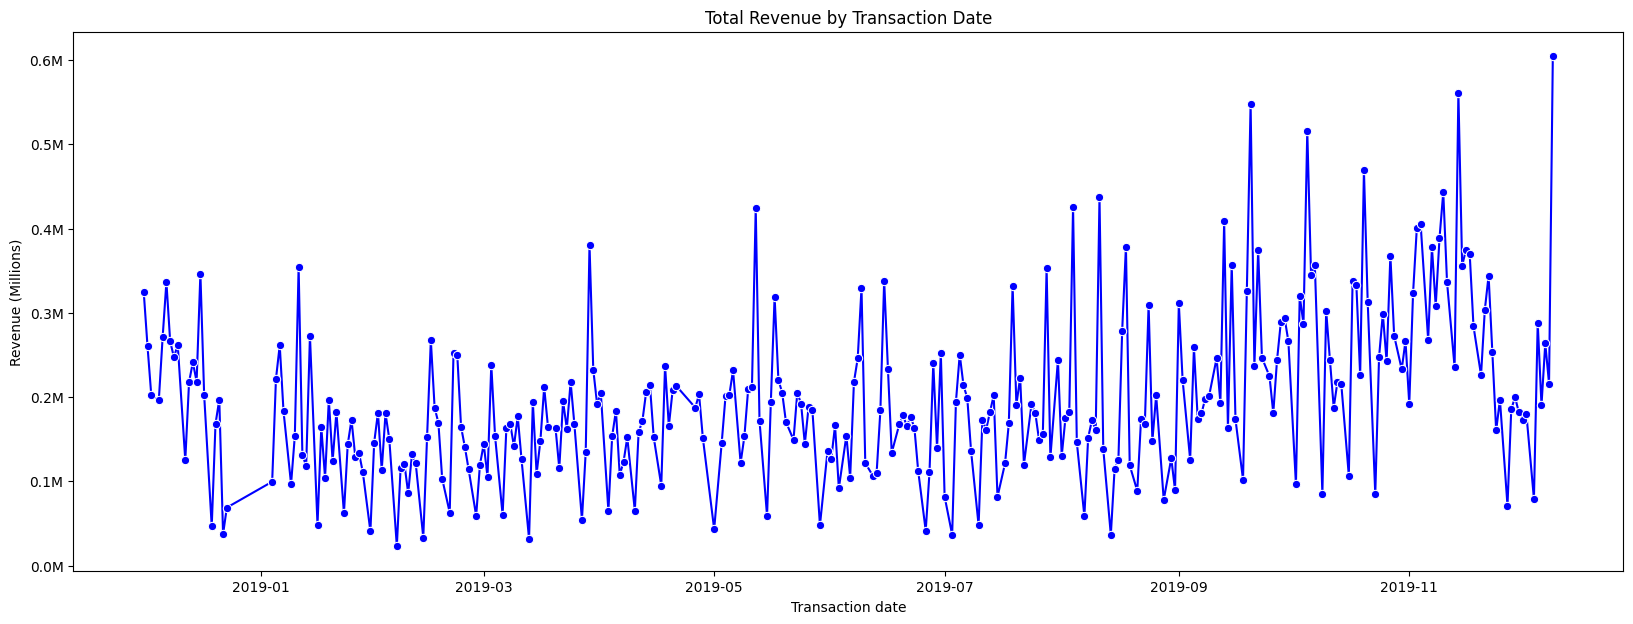

In [96]:
#data from section 1.2
df=df.copy()
#Plot the sum of revenue on transaction_date in a line plot
print("Duration of time series:", df['transaction_date'].min(),df['transaction_date'].max())
daily_tot_rev=df.groupby(['transaction_date'],as_index=False)['Revenue'].sum()
# plot the line plot
fig,ax=plt.subplots(figsize=(20,7))
ax=sns.lineplot(data=daily_tot_rev, x='transaction_date',y='Revenue', marker='o', linestyle='-', color='b')
# provide label and title
ax.set_title("Total Revenue by Transaction Date")
ax.set_ylabel("Revenue (Millions)")  # Set y-axis label
ax.set_xlabel("Transaction date") # Set x-axis label
# converting revenue numbers to million
ax.yaxis.set_major_formatter(lambda x, pos: f'{x / 1000000:.1f}M')
plt.show()

Summary :
- Above plot shows daily revenue from 2018-12-01 to 2019-12-09
- Data shows increasing trend and high variations, needs more investigation to check if this variation is due to weekends, holidays etc

Code Explanation:
- Raw data has revenue by daily transaction and multiple customers. To build time series model. Data is first aggregated to transaction level, so one row per time interval is observed. And visualize the time series before proceeding with further analysis.

### Missing data imputaion

In [97]:
# Test Case : To check is any data is missing
# Calculate the difference in days
datediff = daily_tot_rev['transaction_date'].max() - daily_tot_rev['transaction_date'].min()
#extracting number of days
expected_no_of_days = datediff.days+1
print("Summary:")
print(f"The number of days between {daily_tot_rev['transaction_date'].max()} and {daily_tot_rev['transaction_date'].min()} is: {expected_no_of_days}")
print(f"Total {expected_no_of_days-daily_tot_rev.shape[0]} days are missing")

Summary:
The number of days between 2019-12-09 00:00:00 and 2018-12-01 00:00:00 is: 374
Total 69 days are missing


Code Explanation:
- This step check if there any missing records in data. To test that number of expected days between minimum and maximum transaction data is calculated and checked if this is same with number of records in data. if number of records in data is less than expected number of days, that implies data has missing records

In [98]:
# Find missing dates and impute
# Creating an empty data frame which will have all the dates between min and max date of original data.
date_range = pd.date_range(start=daily_tot_rev['transaction_date'].min(), end=daily_tot_rev['transaction_date'].max(), freq='D')
# empty datafrmae with all dates
df_dates = pd.DataFrame({'transaction_date': date_range})

#Check data information before imputation
print("\033[94mSummary of daily revenue data before imputation.\033[0m")
print("*" *40)
print(daily_tot_rev.info())
print("*" *40)
# Merge data with all dates with transaction dataframe so a record for missing date will be created.
daily_rev = df_dates.merge(daily_tot_rev, on='transaction_date', how='left')

# Get a list of dates with missing revenue.
list_of_missing_dates =daily_rev[daily_rev['Revenue'].isnull()]['transaction_date'].unique()

#fill missing records with average revenue.
mean_val=daily_rev['Revenue'].mean()
daily_rev['Revenue'] = daily_rev['Revenue'].fillna(mean_val)

#Check data information after imputation
print("\033[94mSummary of daily revenue data after imputation.\033[0m")
print("*" *40)
print(daily_rev.info())
print("*" *40)

#set datetime index
daily_rev.set_index('transaction_date', inplace=True)
daily_rev.head()

Summary of daily revenue data before imputation.
****************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transaction_date  305 non-null    datetime64[ns]
 1   Revenue           305 non-null    float32       
dtypes: datetime64[ns](1), float32(1)
memory usage: 3.7 KB
None
****************************************
Summary of daily revenue data after imputation.
****************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   transaction_date  374 non-null    datetime64[ns]
 1   Revenue           374 non-null    float32       
dtypes: datetime64[ns](1), float32(1)
memory usage: 4.5 KB
None
************

,Revenue
transaction_date,
2018-12-01,324649.22
2018-12-02,260301.66
2018-12-03,201975.19
2018-12-04,197639.44
2018-12-05,196630.80


Summary :
- Observed 69 days are missing in data.
- These dates are imputed by average revenue

Code Explanation: Missing value imputation
- This code has 2 parts, in first part to find missing records. This is done my creating an empty data frame for all the dates from minimum to maximum dates in original data. After merging this data with original data missing value records get added to original data
- This missing record is then imputed by average revenue. Once missing value is imputed data information is checked before and after imputaion


### Data understading with seasonal decompostion

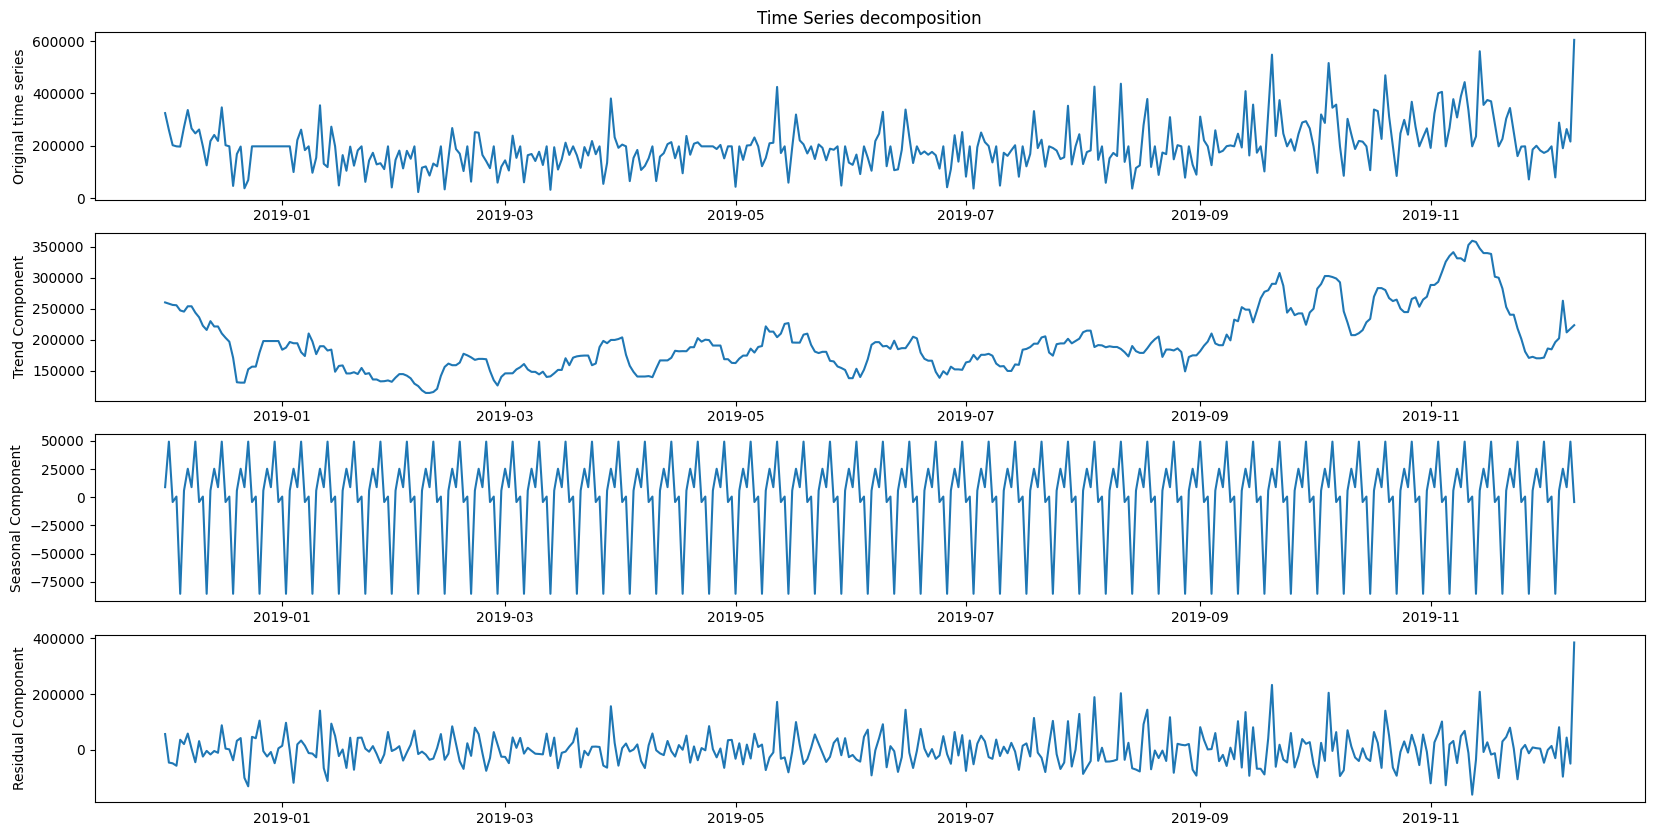

In [99]:
#seasonal decomoposition of time series, add extrapolate trend to avoid null values in result
result = seasonal_decompose(daily_rev['Revenue'] , model='additive',extrapolate_trend='freq')
#resuls are saved in dataframe
seasonal_decomp_df=pd.DataFrame()
#trend component
seasonal_decomp_df['trend']=result.trend
# seasonal component
seasonal_decomp_df['seasonal']=result.seasonal
#residual component
seasonal_decomp_df['residual']=result.resid
#Original time series
seasonal_decomp_df['observed']=result.observed
#plot seasonal decomposition

# # Original Series
fig, axes = plt.subplots(4, figsize=(20, 10))
axes[0].plot(seasonal_decomp_df['observed']);
axes[0].set_ylabel('Original time series')
axes[0].set_title('Time Series decomposition')
axes[1].plot(seasonal_decomp_df['trend']);
axes[1].set_ylabel('Trend Component')

axes[2].plot(seasonal_decomp_df['seasonal']);
axes[2].set_ylabel('Seasonal Component')

axes[3].plot(seasonal_decomp_df['residual']);
axes[3].set_ylabel('Residual Component')
# result.plot()
plt.show()

Seasonal decomposition Summary :
- Data shows multiple directional change points in trend, observed a decreasing trend in revenue in initial period till Jan 2019.
- From Jan 2019 data shows various peaks and troughs followed by increase in trend from September 19 followed by drop in November
- Data shows weekly seasonality, increase in sales is observed on Sunday followed by drop next day
- High variation in residual is observed, this unexplained behaviour needs to be evaluated

Code Explanation: seasonal decomposition
- To understand trend, seasonality and residual component of the time series. seasonal decomposition from statsmodel is used.
- This package decomposes time series into different component and provide their value. by default it produces NULL values at the start if the series, to avoid that NULL values extrapolate trend parameter is used.
-To plot the decompose time series, values of each component is stores in dataframe and series is ploted using matplotlib


### Checking stationarity of time series

In [100]:
# ADF test
result = adfuller(daily_rev['Revenue'])
# Print the results
print('p-value:', result[1])

# Interpret the results
if result[1] <= 0.05:
  print(" Reject the null hypothesis i.e. series is likely  to be stationary")
else:
   print(" Accept the null hypothesis i.e. series is non stationary")

p-value: 0.167680639547299
 Accept the null hypothesis i.e. series is non stationary


Code Explanation: Stationarity Test
- Above code is used to perform Augmented Dickey fuller test to perform test of stationarity.
- Null Hypothesis for this test is : time series has unit root i.e. it is non-stationary and alternate it is stationary time series.
- Since here p-value is more than level of significance, null hypothesis is accepted i.e. series is non- stationary.


### Time series forecasting with Grid Search

In [101]:
# # Train Test split
#train data with revenue values
train=daily_rev.loc['2019-01-01':'2019-10-31'].values
print(f"shape of train data {train.shape}")
# test data with revenue values
test=daily_rev.loc['2019-11-01':].values
#for graphs
test1=daily_rev.loc['2019-11-01':]
print(f"shape of test data {test.shape}")

################### Check with team ###########
# data = daily_rev.loc['2019-01-01':'2019-11-01'].values
# # Split the data into training and testing sets
# #train data with revenue values
# train_size = int(len(data) * 0.7)
# # # test data with revenue values
# #test data with revenue values
# train, test = data[:train_size], data[train_size:]
# print(f"shape of train data {train.shape}")
# print(f"shape of test data {test.shape}")

# Grid search method
history = [x for x in train]
predictions = list()
# performance metric
MAE=[]
# ARIMA order
p_values = [0,1,2]
d_values = [0,1,2]
q_values = [0,1,2]
arima_order=[]
# track iterations
iteration=0
# walk-forward validation
best_score= float("inf")
for p in p_values:
  for d in d_values:
    for q in q_values:
      # order based p,d,q values
      order = (p, d, q)
      iteration+=1
      for t in range(len(test)):
        # fit an ARIMA model
        model = ARIMA(history, order=order)
        #fit the model
        model_fit = model.fit()
        # gnerate the the forecast
        results = model_fit.forecast()
        # point forecast
        y_pred=results[0]
        #save forecast in list
        predictions.append(y_pred)
        obs = test[t]
        # add t+1 point from test data is added in history to execute walk foreward method
        history.append(obs)
      # calculate mean absolute error of current iteration
      mae = mean_absolute_error(test, predictions)
      # for next iteration values from train is assigned to history
      history = [x for x in train]
      # predictions are initiated
      predictions = list()
      #append MAE value of current iteration
      MAE.append(mae)
      #save arima order
      arima_order.append(order)
      print(f"iteration: {iteration} and Arima order :{p,d,q} ")
      print('Test MAE: %.3f' % mae)


shape of train data (304, 1)
shape of test data (39, 1)
iteration: 1 and Arima order :(0, 0, 0) 
Test MAE: 99557.407
iteration: 2 and Arima order :(0, 0, 1) 
Test MAE: 92495.370
iteration: 3 and Arima order :(0, 0, 2) 
Test MAE: 89055.139
iteration: 4 and Arima order :(0, 1, 0) 
Test MAE: 89807.287
iteration: 5 and Arima order :(0, 1, 1) 
Test MAE: 90321.888
iteration: 6 and Arima order :(0, 1, 2) 
Test MAE: 90211.370
iteration: 7 and Arima order :(0, 2, 0) 
Test MAE: 137934.434
iteration: 8 and Arima order :(0, 2, 1) 
Test MAE: 89873.743
iteration: 9 and Arima order :(0, 2, 2) 
Test MAE: 91481.366
iteration: 10 and Arima order :(1, 0, 0) 
Test MAE: 89327.164
iteration: 11 and Arima order :(1, 0, 1) 
Test MAE: 88047.095
iteration: 12 and Arima order :(1, 0, 2) 
Test MAE: 92197.771
iteration: 13 and Arima order :(1, 1, 0) 
Test MAE: 83752.894
iteration: 14 and Arima order :(1, 1, 1) 
Test MAE: 90139.526
iteration: 15 and Arima order :(1, 1, 2) 
Test MAE: 90381.237
iteration: 16 and Arim

Code Explanation: Time Series Forecasting
- Data from January to November 1st 2019 is considered and then split into 80% train and rest test.
- Uses Walk forward method to do single step forecasting, after every single step forecasting, data point from test is added to training data and forecasting is done. This recursively happens till all the forecast for length of test is generated.
- Forecast is available for all records MAE is calculated based of forecast and actuals  
- For each step different combination of p,d,q is tried from available list, this recursive process resulted in 27 iterations.



### Identify best parameters

In [102]:
# Find best parameter i.e values of p,d,q
#find the index of minimum values of MAE
min_mae_index = MAE.index(min(MAE))

# Get the corresponding ARIMA order
best_arima_order = arima_order[min_mae_index]

print(f"Best ARIMA order based on minimum MAE {min(MAE)}: {best_arima_order}")

Best ARIMA order based on minimum MAE 83144.59578172247: (2, 1, 0)


Code Explanation: best parameter
- Above code finds best order for ARIMA based on the index of minimum MAE.
- Then same index is used to find the order of ARIMA

## Forecast with best parameters

Test MAE: 83144.596


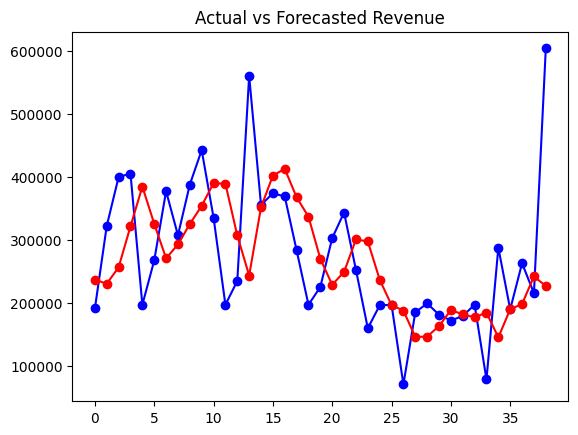

In [103]:
confidence_interval=[]
predictions=[]
# walk-forward validation
for t in range(len(test)):
  # fit an ARIMA model
  model = ARIMA(history, order=(best_arima_order[0],best_arima_order[1],best_arima_order[2]))
  # model = ARIMA(history, order=(2,1,0))
  #fit the model
  model_fit = model.fit()
  # gnerate the the forecast
  results = model_fit.get_forecast()
  # forecast
  y_pred=results.predicted_mean
  predictions.append(y_pred)
  # t+1 observation value
  obs = test[t]
  #append test observation in history
  history.append(obs)
  #get confidence interval
  ci = results.conf_int(0.05)
  confidence_interval.append(ci[0])

# calculate mean absolute error of current iteration
mae = mean_absolute_error(test, predictions)
print('Test MAE: %.3f' % mae)


#plot the results
plt.plot(test, label="Actual revenue",marker='o', linestyle='-', color='b')
plt.title("Actual vs Forecasted Revenue")
plt.plot(predictions, label="forecasted revenue",marker='o', linestyle='-', color='r')
# plt.fill_between(list(range(len(test))),
#                   np.array(confidence_interval)[:,0], np.array(confidence_interval)[:,1],
#                  alpha=0.1, color='b')
plt.show()

# Summary :
- ARIMA model with order 2,1,0 has captured the trend.
- Model still needs further improvement with to capture seasonality

Code Explanation: Forecasting with best parameter
- This code uses best paramter from grid search to generate forecast
- This uses ealier recursive single point forecast to generate forecast for test data
- Once the forecast is generated values forecast is compared with actual values

# Multistep forecasting with grid search

In [104]:
# Step 6: Define the range of p, d, q parameters for the ARIMA model
p = d = q = range(0, 3)
pdq_combinations = list(itertools.product(p, d, q))  # Generate all combinations of p, d, q

# Step 7: Initialize variables to store the best model and lowest MAE
best_pdq = None
best_mae = float("inf")  # Set initial MAE to a very high value

# Step 8: Grid search for the best (p, d, q) combination
for pdq in pdq_combinations:
    try:
        # Fit ARIMA model with the current pdq combination
        model = ARIMA(train, order=pdq)
        model_fit = model.fit()

        # Forecast on the test set
        forecast = model_fit.forecast(steps=len(test))

        # Calculate Mean Absolute Error (MAE)
        mae = mean_absolute_error(test, forecast)

        # Check if the current model has the lowest MAE
        if mae < best_mae:
            best_mae = mae
            best_pdq = pdq

        print(f"ARIMA{pdq} - MAE: {mae}")

    except Exception as e:
        print(f"ARIMA{pdq} failed. Error: {e}")
        continue

# Step 9: Print the best ARIMA model and its MAE
print(f"Best ARIMA model: {best_pdq} with MAE: {best_mae}")

ARIMA(0, 0, 0) - MAE: 102504.6062008424
ARIMA(0, 0, 1) - MAE: 102468.43938033961
ARIMA(0, 0, 2) - MAE: 102326.4656910903
ARIMA(0, 1, 0) - MAE: 90887.43509615384
ARIMA(0, 1, 1) - MAE: 90402.01071950016
ARIMA(0, 1, 2) - MAE: 90399.25596483576
ARIMA(0, 2, 0) - MAE: 664317.0088141026
ARIMA(0, 2, 1) - MAE: 97147.20389194718
ARIMA(0, 2, 2) - MAE: 98016.26488202089
ARIMA(1, 0, 0) - MAE: 102504.12975776405
ARIMA(1, 0, 1) - MAE: 89061.87583349373
ARIMA(1, 0, 2) - MAE: 102229.20397223979
ARIMA(1, 1, 0) - MAE: 90235.88236181691
ARIMA(1, 1, 1) - MAE: 90400.76196633023
ARIMA(1, 1, 2) - MAE: 90391.01952874211
ARIMA(1, 2, 0) - MAE: 678127.3497138594
ARIMA(1, 2, 1) - MAE: 95153.85144923379
ARIMA(1, 2, 2) - MAE: 97101.22916235433
ARIMA(2, 0, 0) - MAE: 102074.30541659272
ARIMA(2, 0, 1) - MAE: 102118.08545847624
ARIMA(2, 0, 2) - MAE: 102567.1195107986
ARIMA(2, 1, 0) - MAE: 90300.4164804594
ARIMA(2, 1, 1) - MAE: 90388.09838038987
ARIMA(2, 1, 2) - MAE: 90396.78942686148
ARIMA(2, 2, 0) - MAE: 285311.7587533

Test MAE: 83933.344


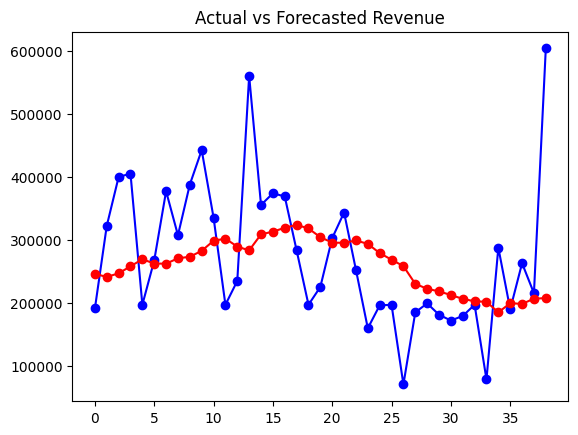

In [105]:
confidence_interval=[]
predictions=[]
# walk-forward validation
for t in range(len(test)):
  # fit an ARIMA model
  model = ARIMA(history, order=(best_pdq[0],best_pdq[1],best_pdq[2]))
  # model = ARIMA(history, order=(2,1,0))
  #fit the model
  model_fit = model.fit()
  # gnerate the the forecast
  results = model_fit.get_forecast()
  # forecast
  y_pred=results.predicted_mean
  predictions.append(y_pred)
  # t+1 observation value
  obs = test[t]
  #append test observation in history
  history.append(obs)
  #get confidence interval
  ci = results.conf_int(0.05)
  confidence_interval.append(ci[0])

# calculate mean absolute error of current iteration
mae = mean_absolute_error(test, predictions)
print('Test MAE: %.3f' % mae)


#plot the results
plt.plot(test, label="Actual revenue",marker='o', linestyle='-', color='b')
plt.title("Actual vs Forecasted Revenue")
plt.plot(predictions, label="forecasted revenue",marker='o', linestyle='-', color='r')
# plt.fill_between(list(range(len(test))),
#                   np.array(confidence_interval)[:,0], np.array(confidence_interval)[:,1],
#                  alpha=0.1, color='b')
plt.show()

Code Explanation: Forecasting with best parameter
- This code uses best paramter from grid search to generate forecast
- This uses ealier recursive single point forecast to generate forecast for test data
- Once the forecast is generated values forecast is compared with actual values

# 2.3 : Neural networks for forecasting

##### Common Deep Learning Time Series Models:
- Recurrent Neural Networks (RNN)
- Long Short-Term Memory (LSTM)-
- Gated Recurrent Units (GRU)
- Convolutional Neural Networks (CNN)
- Transformers
- Autoregressive Neural network (ArNN)
- Fully Connected Neural Networks (FCNNs) with Lagged Inputs

These models can be utilized for both univariate and multivariate time series forecasting, as well as for one-step and multi-step forecasting.

Forecasting with deep learning models can be approached in two primary ways: one-step forecasting and multi-step forecasting. Here's a breakdown of both approaches:

#### One step Forecasting
- Here model forecast next values based on previous observations.
- So, input is a sequqnce of past observations, while output is next value in time series.

#### Multi-Step Forecasting:
- This involves predicting multiple time points in future in sequence.
- This has several stragies like;
#### Direct Multi-Step Forecasting:
- This approach forecast multiple future values in one go
#### Recursive Forecasting:
- Recursive forecasting, forecast value for next time point and uses that - forecast as a part of input for next prediction and this continues till all forecast horizon

Based on above approaches input data set can be prepared.



## Data Wrangling and Modeling Steps for Neural Network

### 1. Data Preprocessing:

Before starting with build a model. It's important to understand data and and make sure correct formatted data is passed through the system.
- Step 1: Visualize the time series and get basic statistics and perform sense checks on data for any erroneous values, anamolies, outliers and missing records.

- Step 2 : Handling Missing Data: Use techniques such as interpolation, forward and backword fill or filling with mean/median to handle missing values. And make sure data is structured as per proper time interval.

- Step 3: Exploratory Data Analysis : Explore data analysis understand time series patterns and impact of any exogenous variables.

- Step 4 : Feature Engineering : As per the model approach and strategies create lagged or transformed features for forecasting.

- Step 5 : Scaling/Normalization: Deep learning models typically perform better when features are scaled. Use MinMaxScaler or StandardScaler to normalize the data. for example : Apply normalization to features like price, quantity, and revenue in given exxample. This step should be done carefully to avoid any data leakeage from future values in training data.

- Step 6 : Stationarity of time series
Neural netowrks do not require time series to be stationary, however non stationary time series can introduce complex patterns difficult to learn and may struggle to capture trend and seasonality. So diffencing or transformations can be benficial

- Step 7 : Train-Test Split: Divide the dataset into training and testing sets based on time without any random shuffling. For example, 80% of the time series is for training and 20% for testing.Split the time series based on a date range, ensuring no data leakage from the future into the training set.

- Step 8 : windowing :
To capture the temporal dependancies windowing is used. which means data is partitioned into subsections which is used to forecast future values. Based on the approach sliding window or expanding window methodology can be used.
In, Sliding window approach the size of the training window remains fixed with every iteration it moves over the time series.
Example: If the sequence length is 3, then the model uses the past 3 days to predict the 4th day's value.
In, Expanding window approach the size of the training window increases with every iteration as it moves over the time series.

- Step 9: Data Reshape : Input data need to be reshaped to use models like LSTM, GRU, or CNN as per their architecure.
For example :  LSTMs and RNNs, the input data needs to be in a specific 3D shape: (samples, time steps, features)
Here,
Samples : Number of samples in input data
Time Steps : Bases ont the approach sliding or expanding window this will decide, how many time steps or previous observation of training data to take to forecast future values.
Features : Number of features in input data. If time series in Univariate then it can be one if multivariate then number of features in input data.


# Model Architecture:

- Recurrent Neural Networks (RNN):
  RNNs are neural networks designed for sequential data but often suffer from vanishing gradient problems, which limit their ability to model long-range dependencies.
  - Model Steps:
  Define an RNN layer with the desired number of neurons.
  Add fully connected (dense) layers to predict the future value.
  Compile the model with an appropriate loss function (e.g., mean_squared_error).

- Long Short-Term Memory (LSTM):
  LSTMs are a type of RNN designed to remember long-term dependencies, making them suitable for time series forecasting.

  - Model Steps:
  Add LSTM layers (with the desired number of neurons and dropout for regularization).
  Use TimeDistributed or Dense layers for the final prediction.
  Compile the model using adam optimizer and mean_squared_error loss.

- Gated Recurrent Units (GRU):
  GRUs are a simpler alternative to LSTMs, requiring fewer resources but offering similar performance for certain tasks.

   - Model Steps:
  Add GRU layers (similar to LSTM but without memory cells).
  Add dense layers for output.
  Compile the model as in LSTM.

- Convolutional Neural Networks (CNN):
  CNNs can be used for time series by treating the input as a temporal grid. This allows the model to extract features at different time resolutions.
  - Model Steps:
  Use 1D convolutional layers (Conv1D) to capture temporal patterns.
  Add pooling layers (MaxPooling1D) for downsampling.
  Flatten the output and connect it to fully connected layers.
  Compile the model with appropriate loss and optimizer.

- Transformers:
  Transformers, which excel in natural language processing, have been adapted for time series forecasting. They use self-attention mechanisms to model dependencies.

  - Model Steps:
  Prepare the input sequences as tokens for the Transformer.
  Build the encoder and decoder layers for the time series data.
  Use multi-head self-attention to model long-term dependencies.
  Compile and fit the model for forecasting future values.




# 3. Model Training:

- Compile the Model: Choose the right optimizer (adam, rmsprop) and the loss function (e.g., mean_squared_error, mean_absolute_error).
- Step: Compile the model with adam optimizer and monitor loss during training.
- Fit the Model: Train the model using the training data, validating on the test set to prevent overfitting.
- Step: Fit the model using early stopping if necessary to prevent overfitting.
- Evaluation: Evaluate the model's performance using metrics like MAE, RMSE, or MAPE.
-Step: After training, make predictions on the test set and evaluate using mean absolute error.


##### 4. References for Deep Learning Time Series Forecasting:

RNN/LSTM/GRU:

- Hochreiter, S., & Schmidhuber, J. (1997). Long short-term memory. Neural computation.
- Chung, J., et al. (2014). Empirical evaluation of gated recurrent neural networks on sequence modeling.
- CNN: Oord, A., Dieleman, S., & Zen, H. (2016). WaveNet: A generative model for raw audio. arXiv preprint.
- Transformers: Vaswani, A., et al. (2017). Attention is all you need. Advances in neural information processing systems.
- General Time Series:Bontempi, G., Ben Taieb, S., & Le Borgne, Y. A. (2012). Machine learning strategies for time series forecasting. European Business Intelligence Summer School.

- Websites

  - https://ai.meta.com/blog/
  - https://www.tensorflow.org/tutorials/structured_data/time_series
  - https://machinelearningmastery.com/-reshape-input-data-long-short-term-memory-networks-keras/
  - https://www.researchgate.net/publication/222578612_Artificial_neural_networks_for_non-stationary_time_series